<a href="https://colab.research.google.com/github/Daniel-Rossi-16/NLP_3_NER/blob/main/NER_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition (NER)
The dataset used in this project is sourced from Kaggle (https://www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus/data?select=ner.csv) and is derived from the Groningen Meaning Bank (GMB) corpus. This dataset is structured to facilitate the training and evaluation of Named Entity Recognition (NER) models. It consists of tokenized text sequences, where each token is labeled with a corresponding entity class.


## Required Installation

In [1]:
# Required libraries from the Requirements.txt
!pip install -r https://raw.githubusercontent.com/Daniel-Rossi-16/NLP_3_NER/main/requirements.txt
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.2 MB/s eta 0:00:00
   

In [ ]:
# Restart to reload dependencies
import os
os.kill(os.getpid(), 9)

In [1]:
import os

# Clone the GitHub Repository
print("\nCloning the repository...")
!git clone https://github.com/Daniel-Rossi-16/NLP_3_NER.git

# Navigate to the Cloned Repository
print("\nNavigating to the cloned repository...")
%cd NLP_3_NER
print(f"Current working directory: {os.getcwd()}")

# List Files in the Repository
print("\nListing files in the repository...")
!ls

# Display current directory again for verification
print(f"\nYou are now in the directory: {os.path.abspath(os.getcwd())}")



Cloning the repository...
fatal: destination path 'NLP_3_NER' already exists and is not an empty directory.

Navigating to the cloned repository...
/content/NLP_3_NER
Current working directory: /content/NLP_3_NER

Listing files in the repository...
LICENSE  NER_Analysis.ipynb  ner.csv  README.md  requirements.txt

You are now in the directory: /content/NLP_3_NER


## Exploratory Data Analysis (EDA)


In [2]:
# Load the Dataset into a DataFrame
import pandas as pd

# Load the dataset from the cloned repository
df = pd.read_csv("ner.csv")

# Display the first few rows
df.head()


,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [4]:
df.isna().sum()

,0
Sentence #,0
Sentence,0
POS,0
Tag,0


## Data Preprocessing

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ner.csv')

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training (80%), validation (10%), and test (10%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Define features (X) and labels (y)
# Combine 'Sentence' and 'POS' as features
X_train = train_df[['Sentence', 'POS']]  # Use both 'Sentence' and 'POS'
y_train = train_df['Tag']  # 'Tag' is the label (NER tags)
X_val = valid_df[['Sentence', 'POS']]
y_val = valid_df['Tag']
X_test = test_df[['Sentence', 'POS']]
y_test = test_df['Tag']

# Check dataset shapes
print(f"Training set size: {train_df.shape}")
print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"\nValidation set size: {valid_df.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
print(f"\nTest set size: {test_df.shape}")
print(f"Test set: X={X_test.shape}, y={y_test.shape}")


Training set size: (38367, 4)
Training set: X=(38367, 2), y=(38367,)

Validation set size: (4796, 4)
Validation set: X=(4796, 2), y=(4796,)

Test set size: (4796, 4)
Test set: X=(4796, 2), y=(4796,)


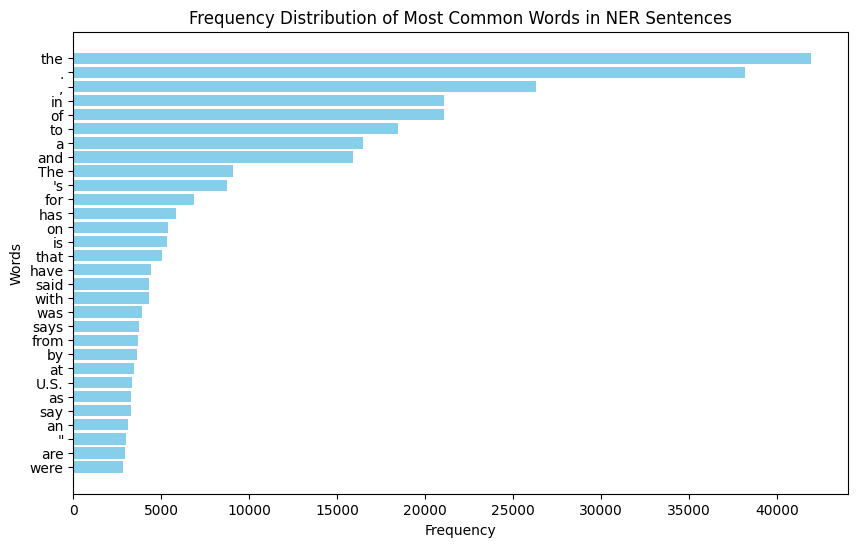

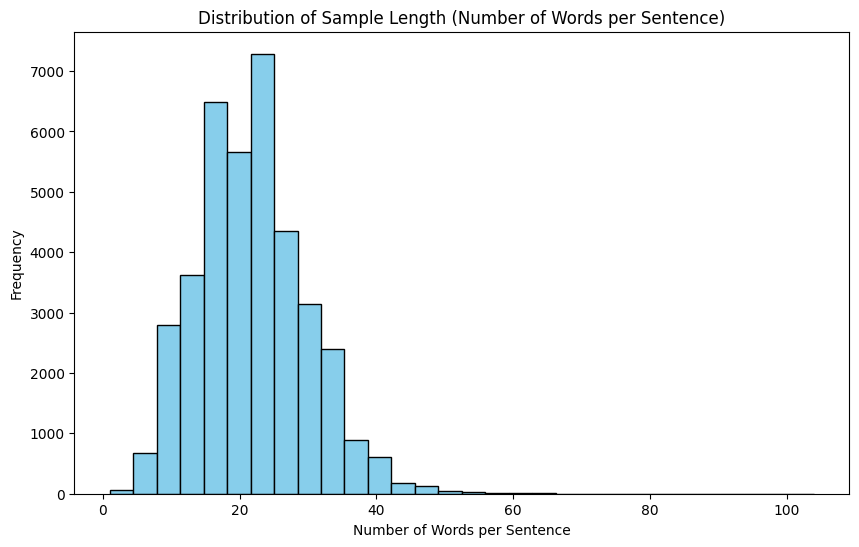


Key Metrics
Number of Samples: 38367
Number of Classes: 27106
Number of Samples per Class:
Tag
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                                                                                 355
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                                                                  343
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                                                                       340
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                         

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 1. Number of samples
num_samples = len(train_df)

# 2. Number of classes (NER tags)
num_classes = train_df['Tag'].nunique()

# 3. Number of samples per class (NER tags)
samples_per_class = train_df['Tag'].value_counts()

# 4. Number of words per sample (calculate the length of each sentence in words)
train_df['word_count'] = train_df['Sentence'].apply(lambda x: len(x.split()))
median_words_per_sample = np.median(train_df['word_count'])
average_words_per_sample = np.mean(train_df['word_count'])

# 5. Frequency distribution of words
all_words = ' '.join(train_df['Sentence']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(30)
words, counts = zip(*most_common_words)

# 5.1 Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.title('Frequency Distribution of Most Common Words in NER Sentences')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent words at the top
plt.show()

# 6. Distribution of sample length (number of words per sentence)
plt.figure(figsize=(10, 6))
plt.hist(train_df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Length (Number of Words per Sentence)')
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Frequency')
plt.show()

# Print the key metrics
print("\nKey Metrics")
print(f"Number of Samples: {num_samples}")
print(f"Number of Classes: {num_classes}")
print(f"Number of Samples per Class:\n{samples_per_class}")
print(f"Median Number of Words per Sentence: {median_words_per_sample}")
print(f"Average Number of Words per Sentence: {average_words_per_sample}")
print(f"Most Common Words and their Frequencies: {most_common_words}")


In [7]:

# 1. Calculate the total number of samples
num_samples = len(train_df)

# 2. Calculate the median number of words per sample
median_words_per_sample = train_df['word_count'].median()

# 3. Calculate the ratio (Number of Samples / Median Number of Words per Sample)
samples_to_median_words_ratio = num_samples / median_words_per_sample

# Print the result
print(f"Number of Samples: {num_samples}")
print(f"Median Number of Words per Sample: {median_words_per_sample}")
print(f"Number of Samples / Median Number of Words per Sample Ratio: {samples_to_median_words_ratio}")

Number of Samples: 38367
Median Number of Words per Sample: 21.0
Number of Samples / Median Number of Words per Sample Ratio: 1827.0


## Encoding

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Unigrams and bigrams
    stop_words='english',  # Remove stopwords
    max_df=0.95,  # Ignore terms appearing in more than 95% of documents
    min_df=2,  # Ignore terms appearing in fewer than 2 documents
    token_pattern=r'\b[a-zA-Z]{3,}\b'  # Only include words with at least 3 letters
)

# Fit the vectorizer on the training data and transform it (using 'Sentence' column)
X_train_tfidf = vectorizer.fit_transform(X_train['Sentence'])
X_val_tfidf = vectorizer.transform(X_val['Sentence'])  # Transform validation data
X_test_tfidf = vectorizer.transform(X_test['Sentence'])  # Transform test data

# Print the first N shuffled feature (n-gram) examples
features = vectorizer.get_feature_names_out()
np.random.shuffle(features)  # Shuffle the features
print("\nShuffled feature n-gram examples:", features[:30])

# Check the number of features in the training data
num_features_train = X_train_tfidf.shape[1]
print(f"\nNumber of features in the training data: {num_features_train}")

# Check the number of features in the test data
num_features_test = X_test_tfidf.shape[1]
print(f"\nNumber of features in the test data: {num_features_test}")

# Now, you have:
# X_train_tfidf, X_val_tfidf, and X_test_tfidf for your TF-IDF transformed features
# y_train, y_val, y_test are your labels (NER tags)


Shuffled feature n-gram examples: ['state control' 'american correspondent' 'escape'
 'parliament legislative' 'independents' 'afghan prisoner' 'militant'
 'beheading' 'abductors' 'say included' 'felt' 'araujo' 'minister yulija'
 'failed respect' 'abducted sunday' 'iraq early' 'injured attack'
 'barry wood' 'previous month' 'drug enforcement' 'american servicemen'
 'vladimir putin' 'gardens' 'number dead' 'million spent' 'agreed support'
 'blankets' 'say year' 'says intelligence' 'general electric']

Number of features in the training data: 59219

Number of features in the test data: 59219


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you've already done TF-IDF vectorization
# X_train_tfidf, X_val_tfidf, X_test_tfidf are your feature matrices
# y_train, y_val, y_test are your label arrays (NER tags)

# Step 1: Feature selection - Select top 20,000 features based on the chi-squared test
selector = SelectKBest(chi2, k=20000)

# Apply the selection on training data (replace 'label' with your actual target column)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)  # Use y_train for selecting features
X_test_selected = selector.transform(X_test_tfidf)  # Apply the selection on test data

# Check how many features were selected
print("Number of features after selection:", X_train_selected.shape[1])

# Step 2: Normalization - Standardize the features (optional, but common)
scaler = StandardScaler(with_mean=False)  # Disable centering for sparse matrices

# Fit the scaler on the training data and transform both train and test
X_train_normalized = scaler.fit_transform(X_train_selected)
X_test_normalized = scaler.transform(X_test_selected)

# Check the shape after normalization
print("Shape after normalization (train):", X_train_normalized.shape)
print("Shape after normalization (test):", X_test_normalized.shape)

# Step 3: Visualize the most frequent words based on TF-IDF
# Get the feature names (words) from the vectorizer
words = vectorizer.get_feature_names_out()

# Get the sum of TF-IDF values for each word across all documents
word_freq = X_train_tfidf.sum(axis=0).A1  # Convert sparse matrix to a dense array

# Create a DataFrame to store words and their corresponding frequencies
word_freq_df = pd.DataFrame(list(zip(words, word_freq)), columns=['word', 'frequency'])

# Sort the DataFrame by frequency in descending order and select the top 20 words
top_20_words = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.barh(top_20_words['word'], top_20_words['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Tokens (Words)')
plt.gca().invert_yaxis()  # To have the most frequent word at the top
plt.show()


## Train a Model

# Evaluation and Conclusion
